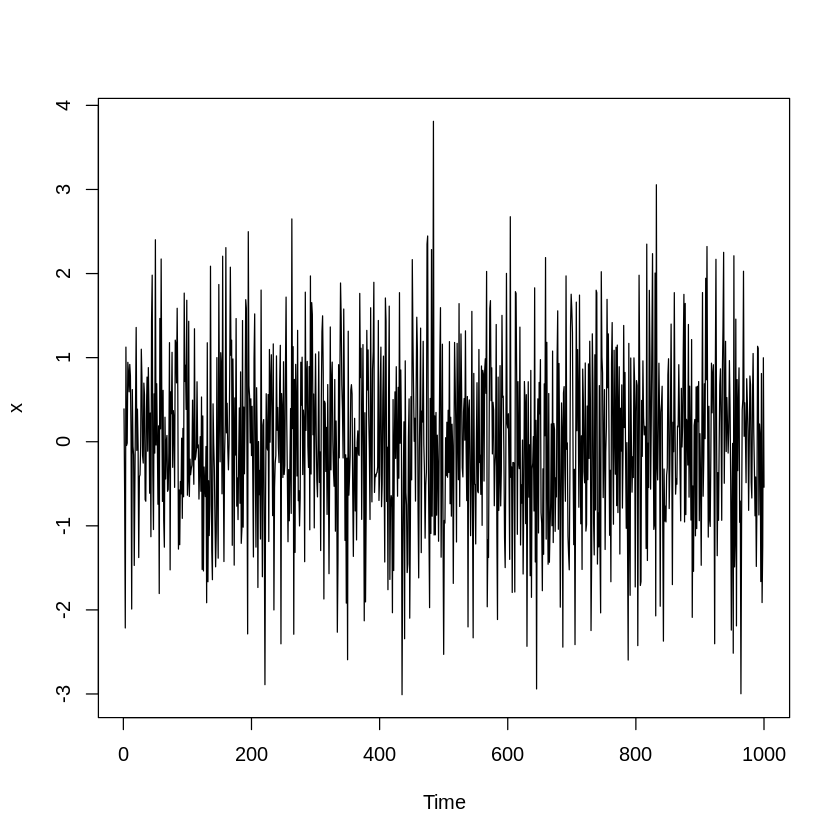

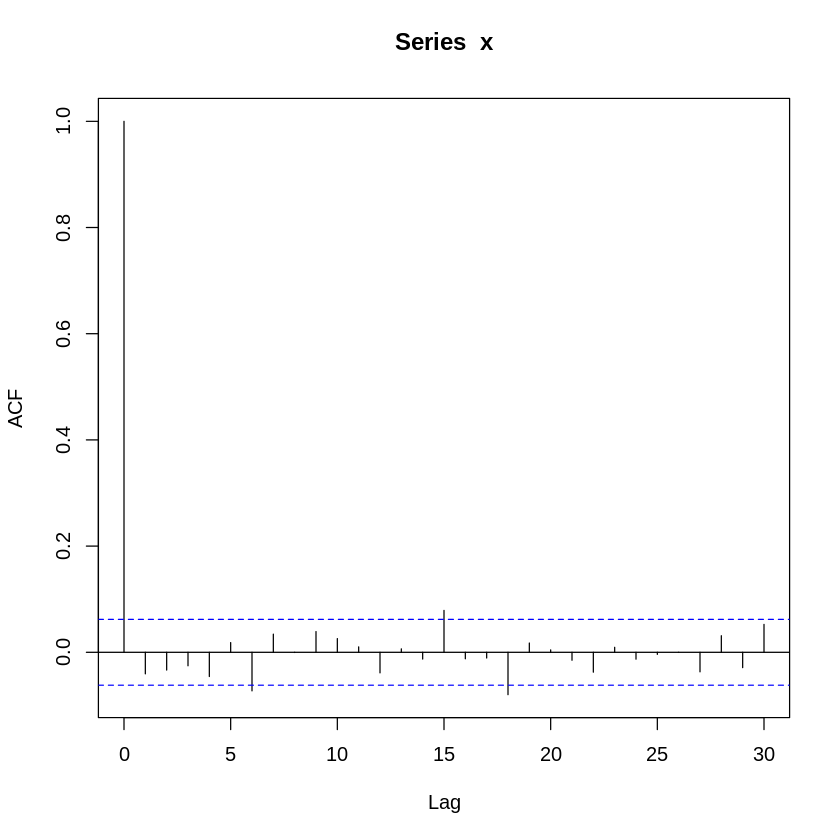

In [44]:
## https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-3/
set.seed(1)
x <- arima.sim(n=1000, model=list(ar=0.5, ma=-0.5))
plot(x)
acf(x)

In [45]:
xa <-arima(x, order=c(1, 0, 1))
xa


Call:
arima(x = x, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.6785  -0.7311    -0.0162
s.e.  0.1673   0.1550     0.0274

sigma^2 estimated as 1.07:  log likelihood = -1452.62,  aic = 2913.23

In [48]:
## sqrt(diag(vcov(xa))[1]) extract the standard error
coef(xa)[1] + c(-1.96, 1.96)*sqrt(diag(vcov(xa))[1]) 
coef(xa)[2] + c(-1.96, 1.96)*sqrt(diag(vcov(xa))[2]) 

[1] 0.350523 1.006388

[1] -1.0349265 -0.4273669

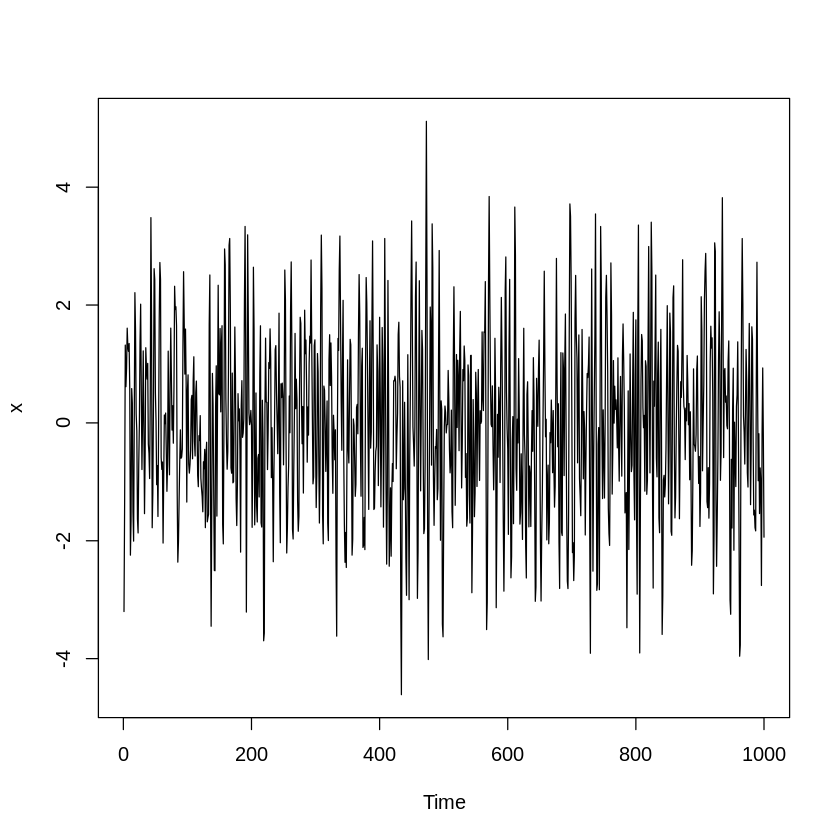

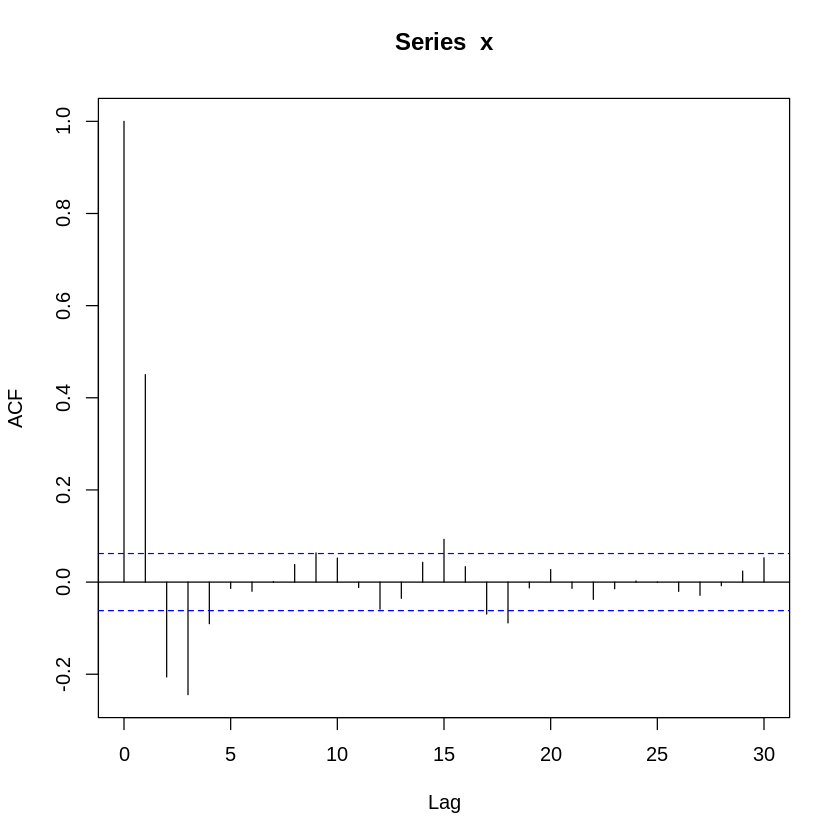

In [49]:
set.seed(1)
x <- arima.sim(n=1000, model=list(ar=c(0.5, -0.25), ma=c(0.5, -0.3)))
plot(x)
acf(x)

In [50]:
xa <- arima(x, order=c(2, 0, 2))
xa


Call:
arima(x = x, order = c(2, 0, 2))

Coefficients:
         ar1      ar2     ma1      ma2  intercept
      0.6529  -0.2291  0.3191  -0.5522    -0.0290
s.e.  0.0802   0.0346  0.0792   0.0771     0.0434

sigma^2 estimated as 1.06:  log likelihood = -1449.16,  aic = 2910.32

In [51]:
coef(xa)[1] + c(-1.96, 1.96)*sqrt(diag(vcov(xa))[1]) 
coef(xa)[2] + c(-1.96, 1.96)*sqrt(diag(vcov(xa))[2]) 
coef(xa)[3] + c(-1.96, 1.96)*sqrt(diag(vcov(xa))[3]) 
coef(xa)[4] + c(-1.96, 1.96)*sqrt(diag(vcov(xa))[4]) 

[1] 0.4957833 0.8100819

[1] -0.2969088 -0.1612332

[1] 0.1639667 0.4742840

[1] -0.7032470 -0.4011181

In [55]:
set.seed(3)
x <- arima.sim(n=1000, model=list(ar=c(0.5, -0.25, 0.4), ma=c(0.5, -0.3)))

In [56]:
final.aic <- Inf
final.order <- c(0,0,0)
for (i in 0:4) for (j in 0:4) {
   current.aic <- AIC(arima(x, order=c(i, 0, j)))
   if (current.aic < final.aic) {
     final.aic <- current.aic
     final.order <- c(i, 0, j)
     final.arma <- arima(x, order=final.order)
   }
 }

Warning message in arima(x, order = c(i, 0, j)):
“possible convergence problem: optim gave code = 1”

In [57]:
final.aic
final.order
final.arma

[1] 2863.365

[1] 3 0 2


Call:
arima(x = x, order = final.order)

Coefficients:
         ar1      ar2     ar3     ma1      ma2  intercept
      0.4470  -0.2822  0.4079  0.5519  -0.2367     0.0274
s.e.  0.0867   0.0345  0.0309  0.0954   0.0905     0.0975

sigma^2 estimated as 1.009:  log likelihood = -1424.68,  aic = 2863.36

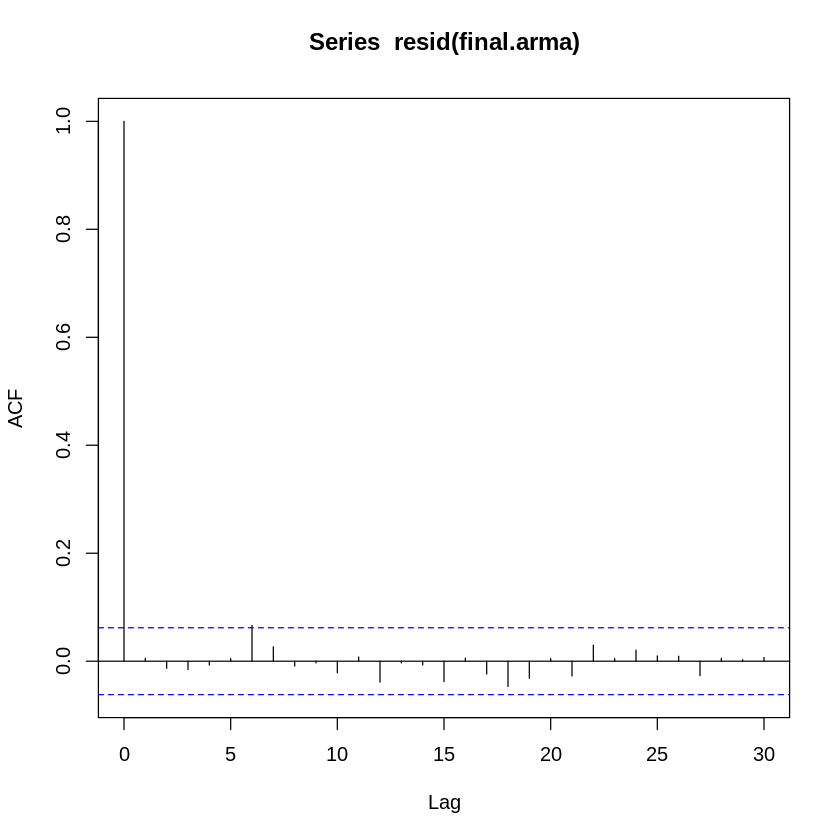

In [58]:
acf(resid(final.arma))

In [59]:
Box.test(resid(final.arma), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(final.arma)
X-squared = 13.193, df = 20, p-value = 0.869


In [60]:
require(quantmod)
getSymbols("^GSPC")
sp = diff(log(Cl(GSPC)))
spfinal.aic <- Inf
spfinal.order <- c(0,0,0)
for (i in 0:4) for (j in 0:4) {
   spcurrent.aic <- AIC(arima(sp, order=c(i, 0, j)))
   if (spcurrent.aic < spfinal.aic) {
     spfinal.aic <- spcurrent.aic
     spfinal.order <- c(i, 0, j)
     spfinal.arma <- arima(sp, order=spfinal.order)
   }
 }

Loading required package: quantmod
Loading required package: xts
Warning message:
“package ‘xts’ was built under R version 3.6.2”Loading required package: zoo
Warning message:
“package ‘zoo’ was built under R version 3.6.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
“package ‘TTR’ was built under R version 3.6.2”Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols fo

[1] "^GSPC"

Warning message in arima(sp, order = c(i, 0, j)):
“possible convergence problem: optim gave code = 1”Warning message in arima(sp, order = spfinal.order):
“possible convergence problem: optim gave code = 1”Warning message in arima(sp, order = c(i, 0, j)):
“possible convergence problem: optim gave code = 1”Warning message in arima(sp, order = c(i, 0, j)):
“possible convergence problem: optim gave code = 1”Warning message in arima(sp, order = spfinal.order):
“possible convergence problem: optim gave code = 1”Warning message in arima(sp, order = c(i, 0, j)):
“possible convergence problem: optim gave code = 1”Warning message in arima(sp, order = c(i, 0, j)):
“possible convergence problem: optim gave code = 1”

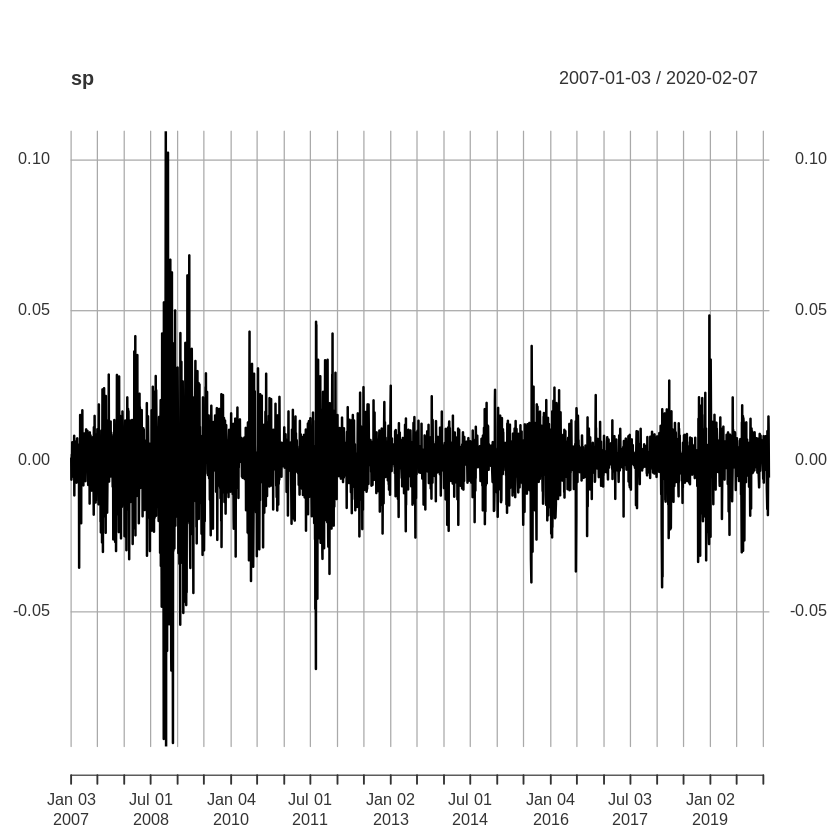

In [61]:
plot(sp)

In [62]:
spfinal.order

[1] 3 0 3

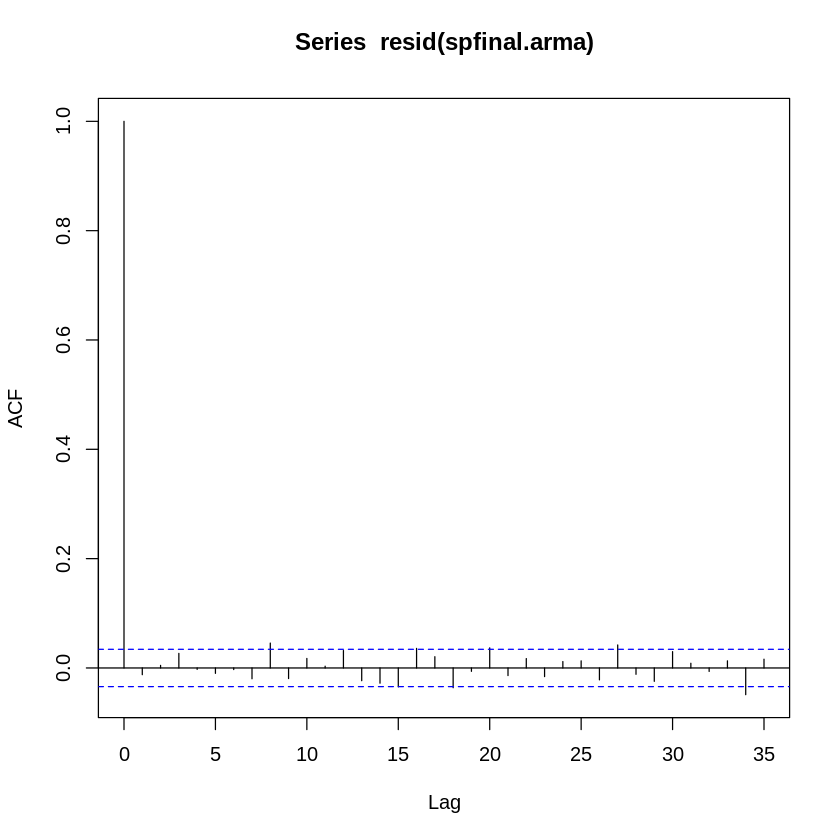

In [63]:
acf(resid(spfinal.arma), na.action=na.omit)

In [64]:
Box.test(resid(spfinal.arma), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(spfinal.arma)
X-squared = 39.964, df = 20, p-value = 0.005048
